# Web Scraping in R
## -- DataCamp - R Programmer - Course 9 --

 **Note**

To use this code, select the R environment in Anaconda
 
 **Used packages**
 - tidyverse
 - rvest
 - xml2
 
**Table of content**
- [&nbsp;&nbsp;1. Introduction to HTML](#toc_74821_1)
    - [&nbsp;&nbsp;1.1 Read HTML into R with the rvest package](#toc_74821_1.1)
    - [&nbsp;&nbsp;1.2 Overview of the tag hierarchy with the xml2 package](#toc_74821_1.2)    
- [&nbsp;&nbsp;2. Navigating the HTML with rvest](#toc_74821_2)
- [&nbsp;&nbsp;3. CSS Selectors](#toc_74821_3)
- [&nbsp;&nbsp;4. Scraping with XPATH](#toc_74821_4)
- [&nbsp;&nbsp;5. Hypertext Transfer Protocol (HTTP)](#toc_74821_5)
- [&nbsp;&nbsp;6. Best practices](#toc_74821_6)
- [&nbsp;&nbsp;7. Case studies](#toc_74821_7)

**Set environment and plot size**

In [3]:
suppressMessages(library(tidyverse))
suppressMessages(library(rvest))
suppressMessages(library(xml2))
options(repr.plot.width=7, repr.plot.height=7) # controls display format
theme_set(theme_grey(base_size =10))

Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer

<a name="toc_74821_1"></a>
## 1.   Introduction to HTML

<div>
 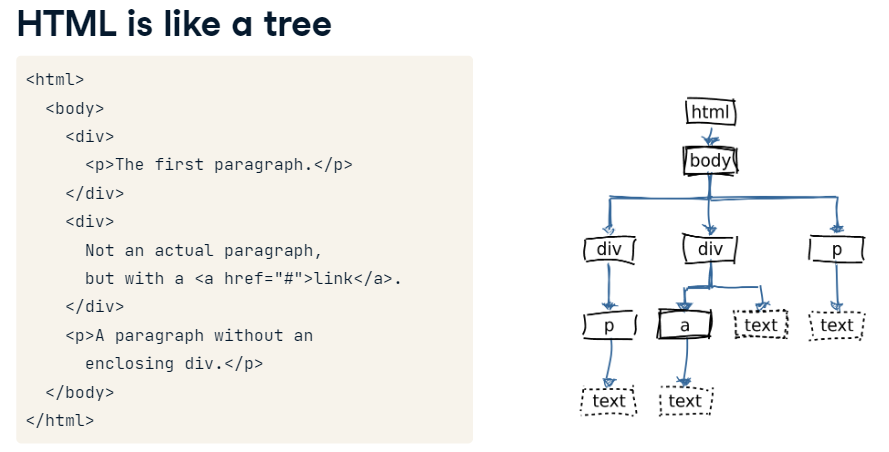
</div>   

There's always a **root node**. In this case, it's the html **tag**. The root has branches that lead to other nodes, or in the language of HTML, to **children**. In the example here, the html tag only has one child, the body tag. From now on, I'll use the terms "element", "node", and "tag" interchangeably – they all mean the same. n contrast, the two div tags, which designate general-purpose sections of a web page, are both children of the body tag. At the same time, they are **siblings**. The first div contains a paragraph, which doesn't have another HTML tag as a child. Instead, it only contains plain text. Here, we speak of a text node, or in tree terms, of a **leaf**. The second div directly contains text, but there's an a tag within. Technically, the text node and the a tag are siblings too. However, the text is a leaf, while the a tag is not a leaf – as it still contains text.

<a name="toc_74821_1.1"></a>
**1.1 Read HTML into R with the `rvest` package**

In [2]:
html <- rvest::read_html(
'<html> 
  <body> 
    <h1>Web scraping is cool</h1>
    <p>It involves writing code – be it R or Python.</p>
    <p><a href="https://datacamp.com">DataCamp</a> 
        has courses on it.</p>
  </body> 
</html>')

html

{html_document}
<html>
[1] <body> \n    <h1>Web scraping is cool</h1>\n    <p>It involves writing co ...

<a name="toc_74821_1.2"></a>
**1.2 Overview of the tag hierarchy with the `xml2` package**

 We can get a better overview of the tag hierarchy of the HTML excerpt with the `xml2` package

In [3]:
xml2::xml_structure(html)

<html>
  <body>
    {text}
    <h1>
      {text}
    {text}
    <p>
      {text}
    {text}
    <p>
      <a [href]>
        {text}
      {text}
    {text}


<a name="toc_74821_2"></a>
## 2.  Navigating the HTML tree with rvest

Used functions:
- `html_children()` - takes an HTML document or a so-called **node set** as input and returns its children, or more specifically, an xml_nodeset.
- `html_text()` -  extract the text of all text from the body tag, so in this case all texts.
- `html_element()` -  only returns the first node that matches your selection
- `html_elements()` - similar but also takes a **selectors**, which is a string that specifies a path through the html tree. The selector also adheres to the **descendant syntax**.
- `html_attr()` - can extract the attributes from an HTML element
- `html_attrs()` - returns all attributes of an element as a named vector
- `html_table()` - converts tables to a list of tibbles

<a name="toc_74821_2.1"></a>
**2.1 Basic rvest functions**

In [4]:
html %>% 
  html_children()

{xml_nodeset (1)}
[1] <body> \n    <h1>Web scraping is cool</h1>\n    <p>It involves writing co ...

☝️  In this case, the html document only has one child – the body tag.

In [5]:
html %>% 
  html_children() %>%
  html_text()

[1] " \n    Web scraping is cool\n    It involves writing code – be it R or Python.\n    DataCamp \n        has courses on it.\n  "

In [6]:
html %>% 
  html_element('body')

{html_node}
<body>
[1] <h1>Web scraping is cool</h1>
[2] <p>It involves writing code – be it R or Python.</p>
[3] <p><a href="https://datacamp.com">DataCamp</a> \n        has courses on i ...

In [7]:
html %>% 
  html_elements('p a')

html %>% 
  html_elements('p') %>%
  html_elements('a')  # same result

{xml_nodeset (1)}
[1] <a href="https://datacamp.com">DataCamp</a>

{xml_nodeset (1)}
[1] <a href="https://datacamp.com">DataCamp</a>

☝️ `html_elements()` To select only the text of paragraphs that are children of a div, you write "div" followed by "p", with a blank in between: `html_elements('div p')`

In [8]:
html %>% 
  html_elements('a') %>% 
  html_attr('href')

[1] "https://datacamp.com"

In [9]:
html %>% 
  html_elements('a') %>% 
  html_attrs()

[[1]]
                  href 
"https://datacamp.com"

<a name="toc_74821_2.2"></a>
**2.2 Parse links into an R dataframe**

In [10]:
hyperlink_raw_html <- "\n<html>\n  <body>\n    <h3>Helpful links</h3>\n    <ul>\n      <li><a href=\"https://wikipedia.org\">Wikipedia</a></li>\n      <li><a href=\"https://dictionary.com\">Dictionary</a></li>\n      <li><a href=\"https://duckduckgo.com\">Search Engine</a></li>\n    </ul>\n    <small>\n      Compiled with help from <a href=\"https://google.com\">Google</a>.\n    </small>\n  </body>\n</html>"

In [11]:
# Extract all the a nodes from the bulleted list
links <- hyperlink_raw_html %>% 
  read_html() %>%
  html_elements('li a') # 'ul a' is also correct!

links

{xml_nodeset (3)}
[1] <a href="https://wikipedia.org">Wikipedia</a>
[2] <a href="https://dictionary.com">Dictionary</a>
[3] <a href="https://duckduckgo.com">Search Engine</a>

In [12]:
# Extract the needed values for the data frame
domain_value = links %>% html_attr('href')
name_value = links %>% html_text()

# Construct a data frame
link_df <- tibble(
  domain = domain_value,
  name = name_value
)

link_df

domain,name
<chr>,<chr>
https://wikipedia.org,Wikipedia
https://dictionary.com,Dictionary
https://duckduckgo.com,Search Engine


<u>Scraping tables</u>

<div>
 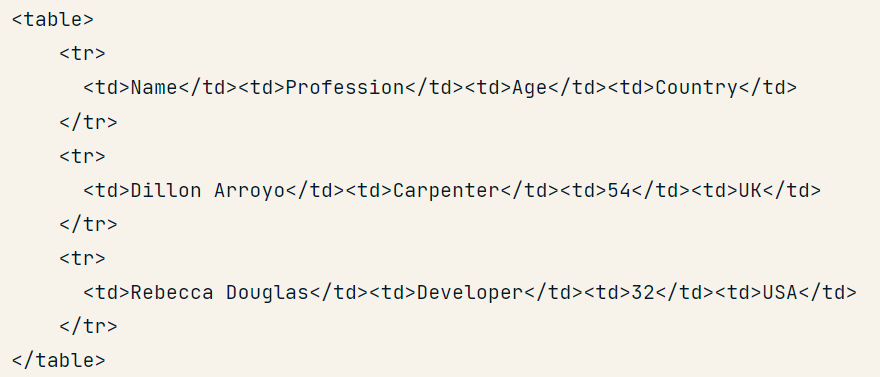
</div> 

A table may consist of only three different HTML tags: 
- `table` - designates a table
- `tr` - designates rows and is wrapped around multiple td tags
- `td` - designate single cells. Normally, the number of `td` tags in each row should be identical. However, there is the `colspan` attribute for `td`, that allows a cell to span multiple columns
- `th` -  header cells that usually contain the column names can be specified explicitly with `th`. Usually, browsers will render this row in bold. 

`rvest` has special functions for scraping tables:
- `html_table()` - converts html tables to a list of tibbles. A useful argument is `header = TRUE`

Tables often have a name (`id=`) that can be used for scarping.
    
<u>Note:</u> instead of actual table elements as described above, developers sometimes use more generic HTML tags like divs to render a table (see below). The actual look and feel of the table are then specified with **CSS**, a complementary style definition language. These styles are referenced with the "`class`" attribute of the div tags here. In such cases, a scraper needs to make use of more advanced selectors. 

<div>
 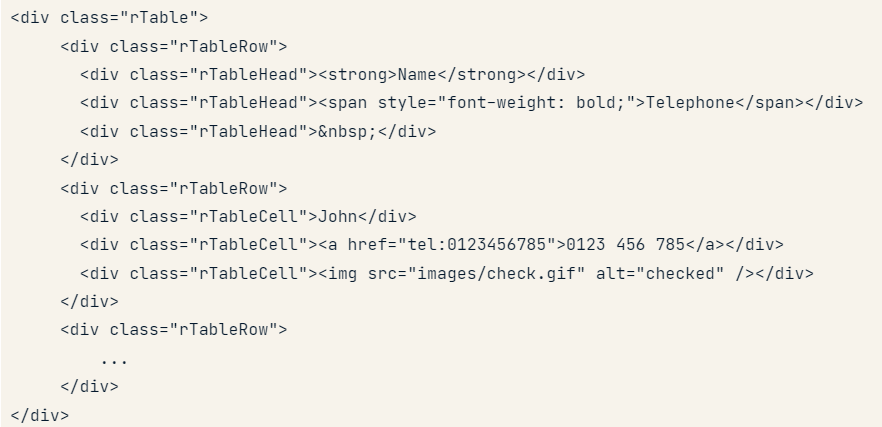
</div>


In [13]:
poke <- read_html("https://pokemondb.net/pokedex/all") %>%
  html_table() 

poke[[1]] %>%
  head(3)

#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
2,Ivysaur,GrassPoison,405,60,62,63,80,80,60
3,Venusaur,GrassPoison,525,80,82,83,100,100,80


In [14]:
# Alternatove method using table ID

poke2 <- read_html("https://pokemondb.net/pokedex/all") %>%
  html_element("table#pokedex") %>%
  html_table() 

poke2 %>%
  head(3)

#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
2,Ivysaur,GrassPoison,405,60,62,63,80,80,60
3,Venusaur,GrassPoison,525,80,82,83,100,100,80


☝️ the output is a tibble.

<a name="toc_74821_3"></a>
## 3.   CSS selectors

<a name="toc_74821_3.1"></a>
**3.1 Type selectors**

CSS can be used to style a web page. It controls how the HTML is rendered in the browser, for example, how big the fonts should be. Let's look at an example.

<div>
 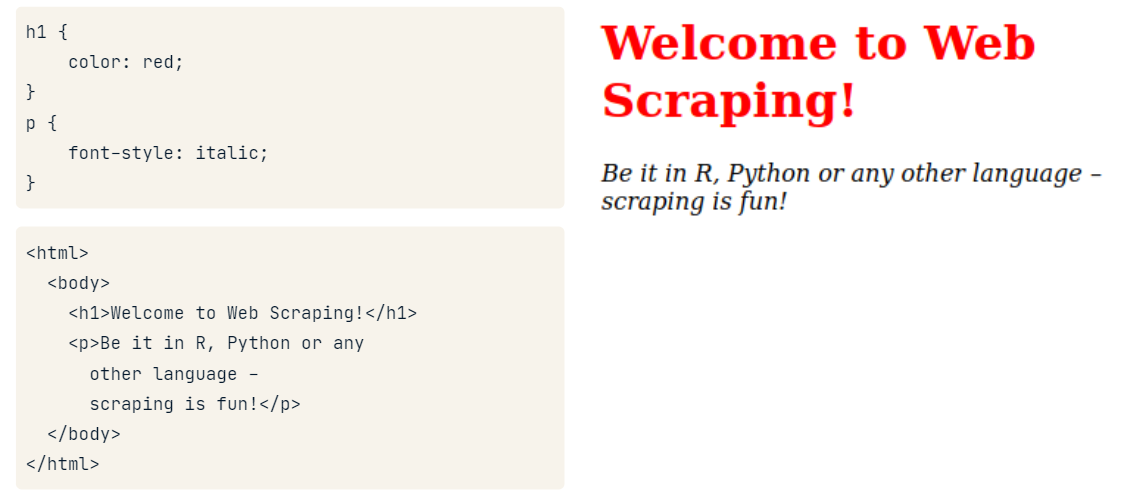
</div>

Above we can see both the CSS and the HTML that was specified to render the simple page on the right. With CSS, a certain style can be specified for any element on that page. Here, two styles are defined. One that concerns all `h1` tags on the page, and another that concerns all paragraph elements. The syntax is simple: A selector is followed by curly braces "`{}`" that contain the styles. A style is always a **key-value-pair**.

<u>Type selectors</u>

The `type` selector is merely the name of the HTML tag that a specific style should apply to, e.g. `div` or `p`. The corresponding `rvest` code for selecting elements by type looks like below. One can also concatenate several types after each other with a comma `,`. The style definition will then be applied to every specified HTML element. Lastly, there's the so-called universal selector, written with an `*`. Styles defined here are applied to every HTML element on the page. 
<div>
 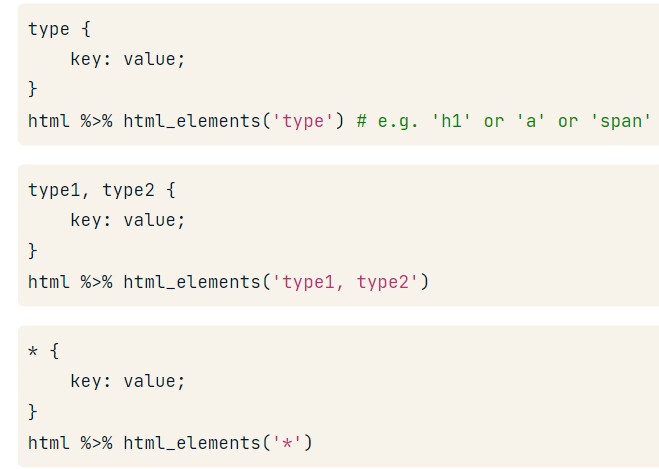
</div>

In [15]:
languages_raw_html <- 
"<html> 
  <body> 
    <div>Python is perfect for programming.</div>
    <p>Still, R might be better suited for data analysis.</p>
    <small>(And has prettier charts, too.)</small>
  </body> 
</html>"

languages_html <- read_html(languages_raw_html)

In [16]:
# Select all div and p elements in this HTML.
languages_html %>%
  html_elements('div, p') %>%  # use "," to select multiple CSS elements that are on the same level
  html_text()

[1] "Python is perfect for programming."                
[2] "Still, R might be better suited for data analysis."

<a name="toc_74821_3.2"></a>
**3.2 CSS classes and IDs**

Using type selectors might be enough for very simple web sites with only basic styling. However, modern web sites are much more complex and usually have hundreds, if not thousands of HTML elements. Therefore, classes and IDs were introduced to better identify certain parts of a page.
$$$$
<u>Classes</u>

With classes, HTML elements can be categorized into certain style groups. Every element with the same class will be applied the same styles as defined in the CSS. This also applies if the types of the HTML elements are different. 
<div>
 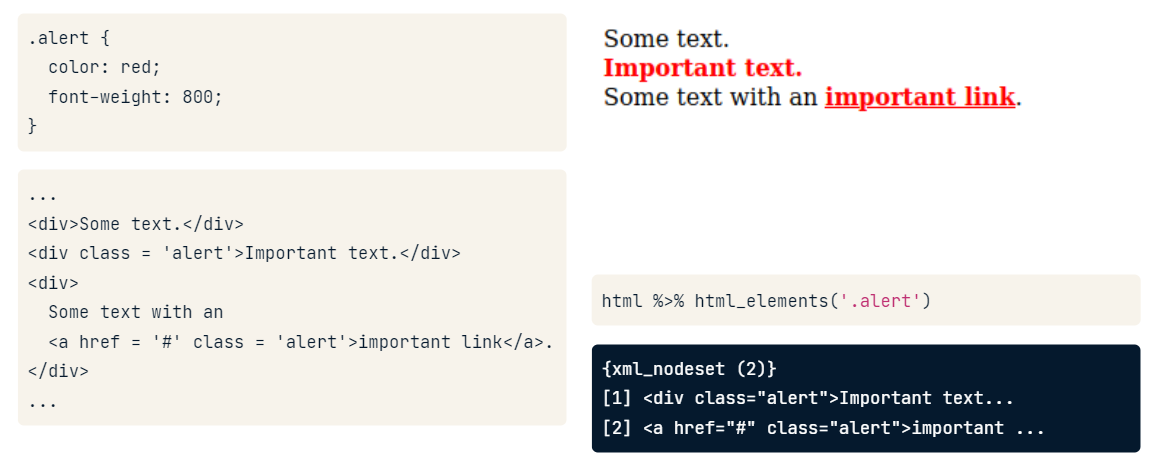
</div>
For instance, one could define a class `.alert` with a red font and apply it to whole divs, but also only to certain links. The class is just another attribute of an HTML element, analogous to the href attribute of an a element. In CSS, classes are specified with a dot, and this of course also applies to selecting them with rvest.
$$$$

We can also select multiple classes (e.g. `.alert` and ` .emph`) at once. In this case:

- `html_elements('.alert.emph')` appending their names without a space selects only the element that has both classes "alert" and "emph".
- `html_elements('.alert, .emph')`  using the comma between both class selects the elements with either the first or the second class.
$$$$
<u>IDs</u>

Similar to classes but should be unique across a web page. That means that there should only be one HTML element with a certain ID in a web site. In CSS, IDs are written with a `#` sign at the beginning. 
<div>
 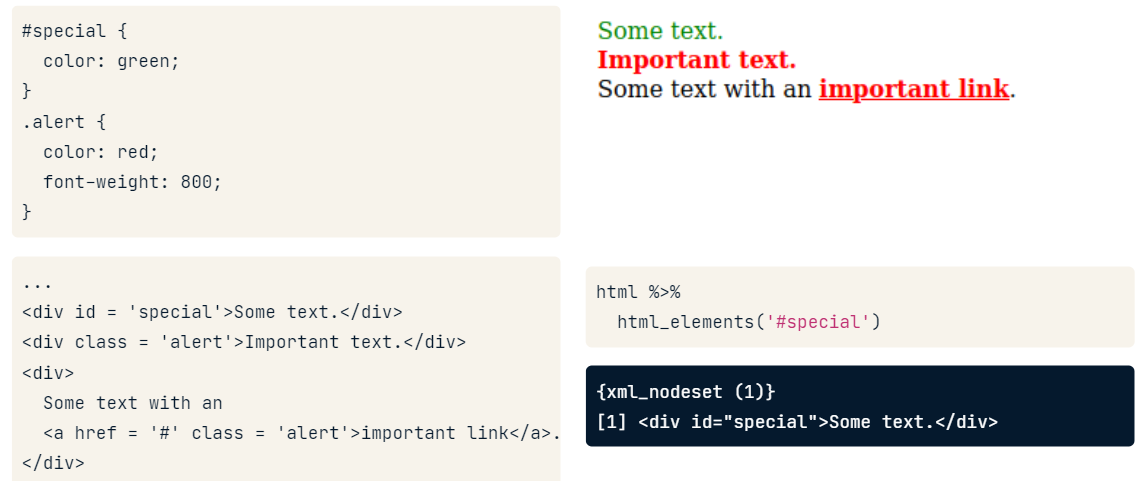
</div>
$$$$
<u>Pseudo-classes for selecting specific childrens</u>

CSS also has a concept called "**pseudo-classes**". There are many different types, but probably the most important are `first-child`, `last-child`, and `nth-child`. 

<div>
 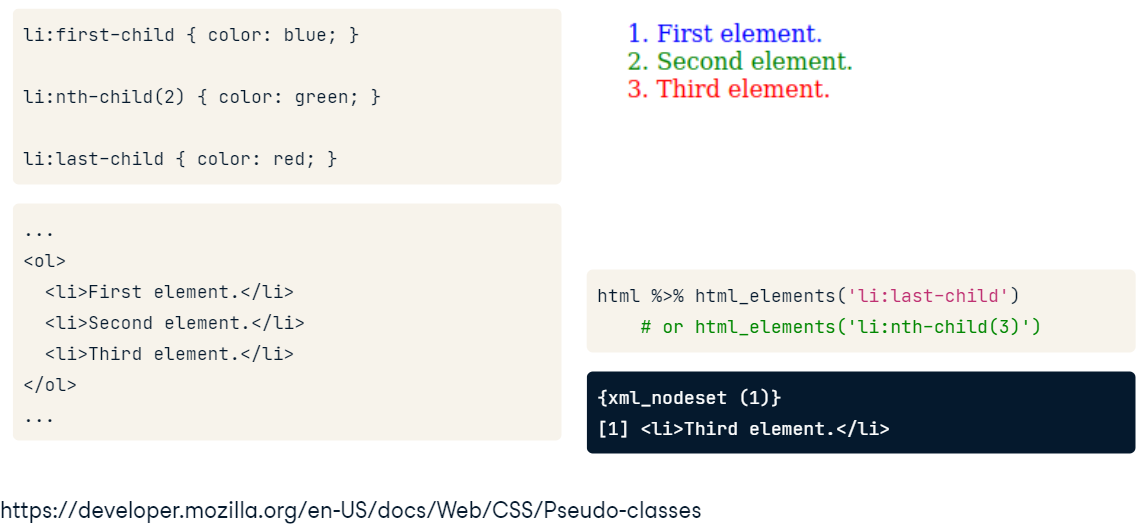
</div>

Here the `li` elements are children of an ordered list. First-child and last-child select the first and the last item in the list, respectively. nth-child is a generalization of both and takes as an argument the position in the list. For example, if you wanted to scrape the last item in the list only, you could either use the last-child pseudo-class or the nth-child class with the number 3 as an argument. Pseudo-classes are normally prepended by the type of the children nodes, followed by a colon.

In [17]:
htt <- "<html>
  <body>
    <div id = 'first'>
      <h1 class = 'big'>Joe Biden</h1>
      <p class = 'first blue'>Democrat</p>
      <p class = 'second blue'>Male</p>
    </div>
    <div id = 'second'>...</div>
    <div id = 'third'>
      <h1 class = 'big'>Donald Trump</h1>
      <p class = 'first red'>Republican</p>
      <p class = 'second red'>Male</p>
    </div>
  </body>
</html>"

html <- read_html(htt)

In [18]:
html %>%
  html_elements('div')

{xml_nodeset (3)}
[1] <div id="first">\n      <h1 class="big">Joe Biden</h1>\n      <p class="f ...
[2] <div id="second">...</div>
[3] <div id="third">\n      <h1 class="big">Donald Trump</h1>\n      <p class ...

In [19]:
html %>%
  html_elements('div:first-child')

{xml_nodeset (1)}
[1] <div id="first">\n      <h1 class="big">Joe Biden</h1>\n      <p class="f ...

In [20]:
htt2 <- "<html>
  <body>
    <div>
      <p class = 'text'>A sophisticated text [...]</p>
      <p class = 'text'>Another paragraph following [...]</p>
      <p class = 'text'>Author: T.G.</p>
    </div>
    <p>Copyright: DC</p>
  </body>
</html>"

html2 <- read_html(htt2)

# Select only the last node of the p's wrapped by the div
html2  %>%
  html_elements('p:last-child.text')

{xml_nodeset (1)}
[1] <p class="text">Author: T.G.</p>

<div>
 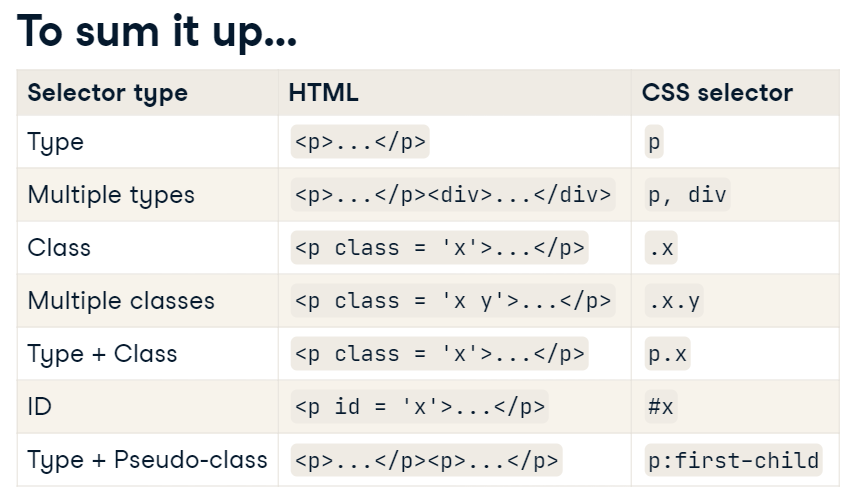
</div>

<a name="toc_74821_3.3"></a>
**3.3 CSS combinators**

There are four different types of commonly used combinators:
- `space` - Descendant combinator
- `>` - Child combinator. It only selects direct descendants of a parent element .
- `+` - Adjacent sibling combinator - selects the direct sibling
- `~` - General sibling combinator - selects all siblings 

They always have the same structure: A CSS selector, followed by a combinator character or operator, followed by another CSS selector:
- `h2#someid {space|>|+|~} .someclass`

<div>
 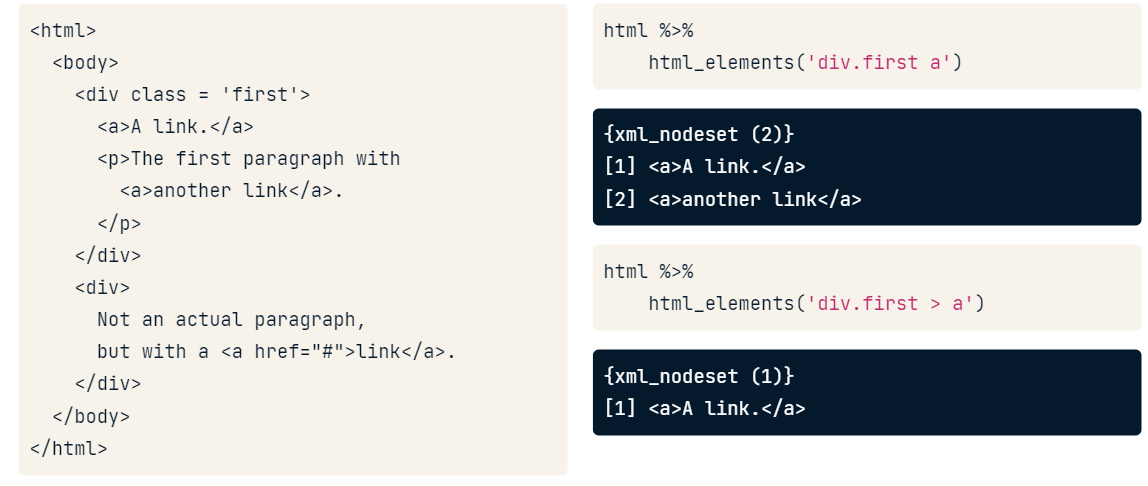
 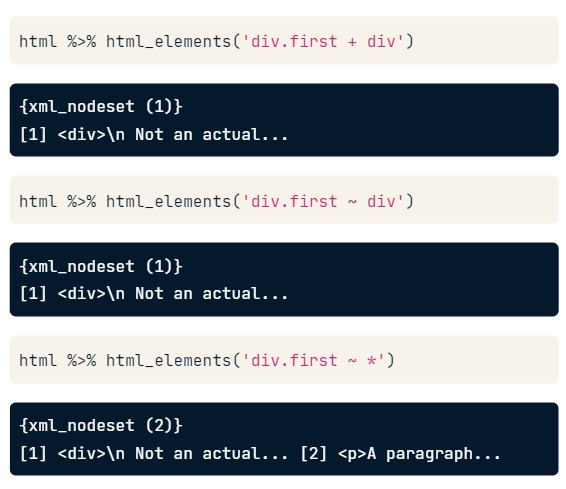
</div>

In [21]:
raw <- "
  <ul id = 'languages'>
    <li>SQL</li>
    <ul>    
      <li>Databases</li>
      <li>Query Language</li>
    </ul>
    <li>R</li>
    <ul>
      <li>Collection</li>
      <li>Analysis</li>
      <li>Visualization</li>
    </ul>
    <li>Python</li>
  </ul>
"

languages_html <- read_html(raw)

In [22]:
# Extract the text of all list elements
languages_html %>% 
  html_elements('li') %>% 
  html_text()

[1] "SQL"            "Databases"      "Query Language" "R"             
[5] "Collection"     "Analysis"       "Visualization"  "Python"

In [23]:
# Extract only the text of the computer languages (without the sub lists)
languages_html %>% 
  html_elements('ul#languages > li') %>% 
  html_text()

[1] "SQL"    "R"      "Python"

In [24]:
languages_html %>% 
  html_elements('ul#languages > li:first-child') %>% 
  html_text()

[1] "SQL"

In [25]:
languages_html %>% 
  html_elements('ul#languages:first-child') %>% 
  html_text()

[1] "SQL\n    Databases\n      Query Language\n    R\n    Collection\n      Analysis\n      Visualization\n    Python\n  "

In [26]:
raw2 <- 
"<html> 
<body> 
  <h2 class = 'first'>First example:</h2>
  <code>some = code(2)</code>
  <span>will compile to...</span>
  <code>some = more_code()</code>
  <h2 class = 'second'>Second example:</h2>
  <code>another = code(3)</code>
  <span>will compile to...</span>
  <code>another = more_code()</code>
</body> 
</html>"

html <- read_html(raw2)

In [27]:
# Select the first code elements in the second example
html %>% 
  html_elements('h2.second + code')  # note: code is not a child of h2, it is on the same level!

{xml_nodeset (1)}
[1] <code>another = code(3)</code>

In [28]:
# Select all code elements in the second example
html %>% 
  html_elements('h2.second ~ code')

{xml_nodeset (2)}
[1] <code>another = code(3)</code>
[2] <code>another = more_code()</code>

<a name="toc_74821_4"></a>
## 4.   Scraping with XPATH

XPATH stands for XML Path Language. With this language, a so-called path through an HTML tree can be formulated, which is a slightly different approach than the one with `CSS selectors`.  

With XPATH, one can not only navigate down the HTML tree, but also up again. And it allows you to select nodes based on properties of other nodes. Through that, more advanced and customized selections of HTML nodes are made possible. For example, you can select nodes whose children match certain properties. That's something not possible with CSS. This justifies learning XPATH in addition to CSS. Some examples:
<div style="text-align:center;">
  <img src="images/html_3.png" width = "200" align="center">
  <img src="images/html_4.png" width = "200" align="center">
</div>

| CSS  |XPATH|
|------|------|
|`p`|`//p`|
|`body p`|`//body//p`|
|`html > body p`|`/html/body//p`|
|`div > p`|`//div/p`|
|`none`|`//div[a]` <- only the those `div` nodes are selected that have an `a`  node as a child| 
| `div > p.blue` | `//div/p[@class = "blue"]` |
| `#special div` | `//*[@id = "special"]//div` |
| `ol > li:nth-child(2)` | `//ol/li[2]` or `//ol/li[position() = 2]`|
| `none` | `//ol/li[position() > 1 and position() < 4 ]` |
| `none` | `//ol[count(li) = 5]` |
| `none` | `//ol/li[text(li) = "Fourth element."]` |


- `//` - means anywhere in the tree
- `/` - Selects from the root node, i.e. means "go down one level"
- `[]` - **Predicates** that are used to find a specific node or a node that contains a specific value
    - `[node name`] - has the given node child(s)
    - `@` - Selects attributes e.g. `@class`, `@id`, `@href`. E.g. `//p[@class]` Selects all p elements that have a class attribute. `//p[@class = "first"]` is more specified
    - `count()` -  select nodes that have a certain amount of children
    - `[number]` - Selects the nth element (similar to position() = number)
    - `position()` - references the current position of each element, and then use that in a predicate. Works with operators `=`, `!=`, `>`, `<=`, `and`,`or`
    - `last()` - Selects the last element. `last()-1` Selects the last but one.
    - `text()` - selects text that is a direct child (ignores nested parts). Can also selects by string
    - `contain(), starts-with(), ends-with()` -  select by match. e.g. `//*[starts-with(@id, 'sometext') and ends-with(@id, '_text')]`
- `..` - selects the parent node
- `.` - selects current node

In [29]:
raw3 <- 
"<html>
  <body>
    <div id = 'first'>
      <h1 class = 'big'>Berlin Weather Station</h1>
      <p class = 'first'>Temperature: 20°C</p>
      <p class = 'second'>Humidity: 45%</p>
    </div>
    <div id = 'second'>...</div>
    <div id = 'third'>
      <p class = 'first'>Sunshine: 5hrs</p>
      <p class = 'second'>Precipitation: 0mm</p>
      <p class = 'third'>Snowfall: 0mm</p>
    </div>
  </body>
</html>"

html3 <- read_html(raw3)

In [30]:
# Select all divs with p descendants
html3 %>% 
  html_elements(xpath = '//div[p]')

{xml_nodeset (2)}
[1] <div id="first">\n      <h1 class="big">Berlin Weather Station</h1>\n     ...
[2] <div id="third">\n      <p class="first">Sunshine: 5hrs</p>\n      <p cla ...

In [31]:
# Select all divs with p descendants having the "third" class
html3 %>% 
  html_elements(xpath = '//div[p[@class = "third"]]')

{xml_nodeset (1)}
[1] <div id="third">\n      <p class="first">Sunshine: 5hrs</p>\n      <p cla ...

In [32]:
# Select p elements with class "second" that are children of "#third"
html3 %>%
  html_elements(xpath = '//div[@id = "third"]/p[@class = "second"]')

{xml_nodeset (1)}
[1] <p class="second">Precipitation: 0mm</p>

In [33]:
# Select the 3rd p element in div having class "third"
html3 %>%
  html_elements(xpath = '//div[@id = "third"]/p[position() = 3]')

{xml_nodeset (1)}
[1] <p class="third">Snowfall: 0mm</p>

In [34]:
# Alternative sytax
html3 %>%
  html_elements(xpath = '//div[@id = "third"]/p[3]')

{xml_nodeset (1)}
[1] <p class="third">Snowfall: 0mm</p>

In [35]:
# Select the 1st and 3rd p element in div having class "third"
html3 %>%
  html_elements(xpath = '//div[@id = "third"]/p[position() = 1 or position() = 3]')

{xml_nodeset (2)}
[1] <p class="first">Sunshine: 5hrs</p>
[2] <p class="third">Snowfall: 0mm</p>

In [36]:
raw4 <- 
"<div>
  <h1>Tomorrow</h1>
</div>
<div>
  <h2>Berlin</h2>
  <p>Temperature: 20°C</p>
  <p>Humidity: 50%</p>
</div>
<div>
  <h2>London</h2>
  <p>Temperature: 15°C</p>
</div>
<div>
  <h2>Zurich</h2>
  <p>Temperature: 22°C</p>
  <p>Humidity: 60%</p>
</div>"

html4 <- read_html(raw4)

In [37]:
# Select only divs with one header and at least two paragraphs
html4 %>%
  html_elements(xpath = '//div/p[1]')

{xml_nodeset (3)}
[1] <p>Temperature: 20°C</p>
[2] <p>Temperature: 15°C</p>
[3] <p>Temperature: 22°C</p>

In [38]:
# Select only divs with one header and at least two paragraphs
html4 %>%
  html_elements(xpath = '//div[count(h2) = 1 and count(p) = 2]')

{xml_nodeset (2)}
[1] <div>\n  <h2>Berlin</h2>\n  <p>Temperature: 20°C</p>\n  <p>Humidity: 50%< ...
[2] <div>\n  <h2>Zurich</h2>\n  <p>Temperature: 22°C</p>\n  <p>Humidity: 60%< ...

In [39]:
# Select by text
html4 %>%
  html_elements(xpath = '//p[text() = "Humidity: 50%"]')

{xml_nodeset (1)}
[1] <p>Humidity: 50%</p>

In [40]:
# Do the same but return the parent of the selected node
html4 %>%
  html_elements(xpath = '//p[text() = "Humidity: 50%"]') %>%
  html_elements(xpath = '..')

{xml_nodeset (1)}
[1] <div>\n  <h2>Berlin</h2>\n  <p>Temperature: 20°C</p>\n  <p>Humidity: 50%< ...

In [41]:
raw5 <- '
<table>
 <tr>
  <th>Actor</th>
  <th>Role</th>
 </tr>
 <tr>
  <td class = "actor">Jayden Carpenter</td>
  <td class = "role"><em>Mickey Mouse</em> (Voice)</td>
 </tr>
 <tr>
  <td class = "actor">Meredith Diaz</td>
  <td class = "role"><em>Minnie Mouse </em> (Choreography)</td>
 </tr>
 <tr>
  <td class = "actor">Louie Hendrix</td>
  <td class = "role"><em>Donald Duck</em> (Voice)</td>
 </tr>
</table>'

html5 <- read_html(raw5)

In [42]:
# Extract the table
html5 %>% 
  html_elements(xpath = '//table') %>%
  html_table()

Actor,Role
<chr>,<chr>
Jayden Carpenter,Mickey Mouse (Voice)
Meredith Diaz,Minnie Mouse (Choreography)
Louie Hendrix,Donald Duck (Voice)


In [43]:
# Extract the roles in the cells having class "role"
roles <- html5 %>% 
  html_elements(xpath = '//table//td[@class = "role"]/em') %>% 
  html_text()
roles

[1] "Mickey Mouse"  "Minnie Mouse " "Donald Duck"

In [44]:
# Extract the functions using the appropriate XPATH function
html5 %>% 
  html_elements(xpath = '//table//td[@class = "role"]/text()') %>%  # text() will only return the child text elements, so the <em> parts are not returned
    html_text(trim = TRUE)

[1] "(Voice)"        "(Choreography)" "(Voice)"

In [45]:
raw6 <- "
<h3>The rules of programming</h3>
<ol>
  <li>Have <em>fun</em>.</li>
  <li><strong>Don't</strong> repeat yourself.</li>
  <li>Think <em>twice</em> when naming variables.</li>
</ol>"

html6 <- read_html(raw6)

In [46]:
# Select all em elements within li elements that have "twice" as text
html6 %>%
  html_elements(xpath = '//li') %>%
  html_elements(xpath = 'em[text() = "twice"]')

{xml_nodeset (1)}
[1] <em>twice</em>

**Real-life example (Pokemon website)**

In [47]:
shiny <- read_html("https://pokemondb.net/pokedex/shiny")
shiny %>%
  html_elements(xpath = '//div[@class = "panel panel-intro"]//em') %>%
  html_text()

[1] "not more powerful" "extremely rare"

In [48]:
shiny %>%
  html_elements(xpath = '//a[@class = "ent-name"]') %>%
  html_text()  %>%
  head()

[1] "Bulbasaur"  "Ivysaur"    "Venusaur"   "Charmander" "Charmeleon"
[6] "Charizard"

In [49]:
shiny %>%
  html_elements(xpath = '//a[contains(@class, "itype")]') %>%
  html_text()  %>%
  unique()

[1] "Grass"    "Poison"   "Fire"     "Flying"   "Water"    "Bug"     
 [7] "Normal"   "Electric" "Ground"   "Fairy"    "Fighting" "Psychic" 
[13] "Rock"     "Steel"    "Ice"      "Ghost"    "Dragon"   "Dark"

<a name="toc_74821_5"></a>
## 5.   Hypertext Transfer Protocol (HTTP)

HTTP is a relatively simple set of rules that dictate **how modern web browsers, or clients, communicate with a web server**.

As shown in this image below the Mozilla Developer Network, a web document or website that contains multiple assets like text, images, and videos, **fetches** all these resources via so-called **GET requests** from one or more servers.

<div style="text-align:center;">
  <img src="images/http.png" width = "700" align="center">
</div>

[How does it work?](https://developer.mozilla.org/en-US/docs/Web/HTTP/Overview)

<u>Request:</u> A request is often only composed of a so-called **method**, in this case, **GET**, a protocol version, and several **headers**. The most important is probably the **host** – the address of the resource that is to be fetched.

<u>Response:</u> In turn, the response from the web server tells the client whether the request was successful, which is denoted by the **status code** and status message. Also, the headers tell the client, your browser, how to deal with that response. Helpful information is for example the Content-Type, which tells the browser which format of content was returned. In this case, it's simple HTML text that now can be rendered in the browser. Here are some typical status codes: 
- `200` = "OK" - everything went well
- `404` = "NOT FOUND" - the resource was not found on the web server. 
- `3xx` = codes in the 300-range are redirects, telling you to fetch the resource at a different address. 
- `5xx` = codes in the 500-range usually result when there was an error on the server, for instance, when a program crashed because of the request.

The most common **request methods** when scraping a page, are:
- [GET]("https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/GET") - used when a resource, be it an HTML page or a mere image, is to be fetched without submitting any user data
- [POST]("https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/POST") - used when you need to submit some data to a web server. This most often is the result of a form that was filled out by the user. The POST request has a payload, which follows the headers. Of course, POST requests also result in a response from the server.
<div style="text-align:center;">
  <img src="images/http_post.png" width = "350" align="center">
</div>
In the case above, a couple of key-value-pairs with data are submitted. These could be form fields that were filled with value1 and value2, respectively. 

To send requests, use the `httr`package, preloaded by `rvest`! useful functions:
- `status_code()`
- `content()`

<a name="toc_74821_4.1"></a>
**4.1 GET requests**

In [50]:
# Send a GET request
response <- httr::GET('https://pokemondb.net/pokedex/shiny')
response

Response [https://pokemondb.net/pokedex/shiny]
  Date: 2023-03-30 15:13
  Status: 200
  Content-Type: text/html; charset=UTF-8
  Size: 785 kB
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<title>Pokémon Shiny-dex (list of shiny sprites) | Pokémon Database</title>
<link rel="preconnect" href="https://img.pokemondb.net">
<link rel="preconnect" href="https://s.pokemondb.net">
<style>@font-face{font-family:"Fira Sans";font-style:normal;font-weight:400;f...
<link rel="stylesheet" href="/static/css/pokemondb-a713220c18.css">
<style>.infocard-lg-img{position:relative;width:128px;height:128px;margin:0 a...
...

In [51]:
httr::status_code(response)

[1] 200

In [52]:
# Parse the response into HTML
httr::content(response)

{html_document}
<html lang="en">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<a class="sr-only" href="#main">Skip to main content</a>\n<header ...

In [53]:
# Get the HTML document from Wikipedia using httr
wikipedia_response <- httr::GET('https://en.wikipedia.org/wiki/Varigotti')
# Parse the response into an HTML doc
wikipedia_page <- httr::content(wikipedia_response)
# Extract the elevation with XPATH
wikipedia_page %>% 
  html_elements(xpath = '//table//tr[position() = 9]/td') %>% 
  html_text()

[1] "0 m (0 ft)"

<a name="toc_74821_6"></a>
## 6. Best practices

<u>Check site policy</u>

After the site name, type `/robots.txt` to see the site specific custom requirements and site maps

<u>Use custom user agents</u>

If you send a letter, you usually write down your name (and maybe your address) on the envelope. You can actually do the same thing when sending requests. Of course, the receiving web server already registers your **IP address**, but a better way is to explicitly tell the web server your name, perhaps an e-mail address, and the purpose of the request. It's not something you'd do when normally surfing the web, of course. But when scraping a page intensively, it is actually good practice. If the owners of the web server notice an unusual spike in traffic, it might be helpful for them to know who they can contact. Who knows, maybe they'll send you the data in a well-structured form or provide you with an API, so you don't have to scrape their page anymore. Probably the best way to identify yourself is through HTTP request headers called **User-Agent header**, which usually tells the server on the other end your device and browser. Often, web servers use this information for site analytics, such as finding out the share of people using a certain browser. Since you are in full control of your requests, you can alter that User-Agent header and turn it into an identification field.

`set_config()` -  globally set the User-Agent header to the string you desire. No need to specify it in future GET()s. E.g. `set_config(add_headers('User-Agent' = "Marta"))`

<u>Throttle (slow down) your requests</u>

**Throttling** becomes relevant if you are scraping a lot of pages in succession. For example, the whole history of a certain Wikipedia page, if you'd want to compare edits made over time. Without throttling, the requests are emitted as fast as possible, meaning that the next request will be fired as soon as the previous one has returned a response from the server. In extreme cases (e.g. writing infinite loops with `while(TRUE)`) hundreds if not thousands of requests may left ones computer within a couple of minutes. Most websites, especially popular ones, will have no problems handling such an amount of requests. However, it is still good practice to apply some sort of "cool down", for example, a second, between each request. There are several approaches to this. 

- `slowly( ~ <func>, rate = rate_delay(<sec>))` function from `purrr` generates a throttled version of any function. It's as if you create a copy of a function, but with a built-in time delay.

<u>Scraping multiple websites</u>

```
url_list <- c("https://...", "https://..." "https://..." "https://...")

for (url in url_list){
  response <- slowly( ~ url, rate = rate_delay(3))
  print(status_code(response))
}
```

In [54]:
httr::GET('https://pokemondb.net/pokedex/shiny', httr::user_agent("A request from a course on scraping"))

Response [https://pokemondb.net/pokedex/shiny]
  Date: 2023-03-30 15:13
  Status: 200
  Content-Type: text/html; charset=UTF-8
  Size: 785 kB
<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<title>Pokémon Shiny-dex (list of shiny sprites) | Pokémon Database</title>
<link rel="preconnect" href="https://img.pokemondb.net">
<link rel="preconnect" href="https://s.pokemondb.net">
<style>@font-face{font-family:"Fira Sans";font-style:normal;font-weight:400;f...
<link rel="stylesheet" href="/static/css/pokemondb-a713220c18.css">
<style>.infocard-lg-img{position:relative;width:128px;height:128px;margin:0 a...
...

In [55]:
slowly( ~ httr::GET('https://pokemondb.net/pokedex/shiny'), rate = rate_delay(3))

function (...) 
{
    rate_sleep(rate, quiet = quiet)
    f(...)
}
<bytecode: 0x000000002a1f6428>
<environment: 0x000000002a1f5f20>

☝️ Note that above we had only one resuest so the delay is not really necessary.

In [63]:
url_list <- c("https://en.wikipedia.org/wiki/Green_sea_turtle", 
              "https://en.wikipedia.org/wiki/Loggerhead_sea_turtle", 
              "https://en.wikipedia.org/wiki/Kemp%27s_ridley_sea_turtle")

for (url in url_list){
  response <- httr::GET(url)
  print(httr::status_code(response))
}

[1] 200
[1] 200
[1] 200


In [66]:
# Define a throttled read_html() function with a delay of 0.5s
read_html_delayed <- slowly(read_html, 
                            rate = rate_delay(0.5))

In [74]:
url_list <- c("https://en.wikipedia.org/wiki/Green_sea_turtle", 
              "https://en.wikipedia.org/wiki/Loggerhead_sea_turtle", 
              "https://en.wikipedia.org/wiki/Kemp%27s_ridley_sea_turtle")

for (url in url_list){
  html <- read_html_delayed(url) 
    
  html %>%
    html_elements(xpath = '//span[@class = "mw-page-title-main"]') %>%
    html_text() %>%
    print()
 }

[1] "Green sea turtle"
[1] "Loggerhead sea turtle"
[1] "Kemp's ridley sea turtle"


<a name="toc_74821_7"></a>
## 7. Case studies

**Get dataset from the web**

In [10]:
suppressMessages(library(janitor))
sw <- read_html("https://stardewvalleywiki.com/Foraging")

foraging <-tables <- sw %>% 
  html_table() 

extract_season <- function(i){
  foraging[[i]]  %>% 
    clean_names() %>%  
    select(where(is.character)) %>% 
    select(name, description, found, used_in, x_24) %>% 
    filter(!str_detect(name, "\\d")) %>% 
    rename(min_sell_price = used_in, used_in = x_24) 
}

spring <- extract_season(7)
summer <- extract_season(24)
autumn <- extract_season(37)
winter <- extract_season(52)

all_seasons <- 
  bind_rows(list(spring = spring, summer = summer, autumn = autumn, winter = winter),
          .id = "id") %>% 
  arrange(min_sell_price)

all_seasons %>% 
  filter(str_detect(found, "Pelican Town")) %>% 
  arrange(id)

id,name,description,found,min_sell_price,used_in
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
autumn,Blackberry,An early-fall treat.,Pelican Town (100%) Cindersap Forest (50%) Railroad (38%) On bushes during Blackberry Season (Fall 8 - 11) Farm Cave (Fruit Bat option),20g,Fall Foraging BundleFall SeedsBlackberry CobblerJellyWine
spring,Daffodil,A traditional spring flower that makes a nice gift.,Pelican Town (100%) Bus Stop (45%) Railroad (45%),30g,Spring Foraging BundleSpring SeedsSandy (loved gift)
summer,Sweet Pea,A fragrant summer flower.,Pelican Town (100%) Cindersap Forest (60%) Bus Stop (47%) Railroad (47%) Forest Farm (25%),50g,Summer Foraging BundleSummer SeedsSandy (loved gift)
winter,Crystal Fruit,A delicate fruit that pops up from the snow.,Railroad (50%) Cindersap Forest (39%) Mountain (38%) Bus Stop (23%) Backwoods (22%) Pelican Town (8%),150g,Winter Foraging BundleWinter SeedsJellyWine
winter,Crocus,A flower that can bloom in the winter.,Pelican Town (54%) Railroad (50%) Bus Stop (42%) Mountain (40%) Cindersap Forest (39%) Backwoods (35%),60g,Winter Foraging BundleWinter SeedsSandy (loved gift)
winter,Holly,The leaves and bright red berries make a popular winter decoration.,Secret Woods (100%) Backwoods (43%) Pelican Town (38%) Bus Stop (35%) Cindersap Forest (22%) Mountain (22%),80g,


**Geti links and download images from a website**

In [6]:
html <- read_html("https://bulbapedia.bulbagarden.net/wiki/Type")

# Extract image links from HTML
imageurl <- html %>%
  html_nodes("table.roundy") %>% .[[3]] %>% # Extract the third table with the class "roundy" from the HTML content.
  html_nodes("td a.image img")  %>% #  Filters to <td> elements that contain an <a> element with the class "image" and an <img> (image) element.
  html_attr("src") # Extract the src attribute from each img tag

# Create a data frame with the image URLs and prepend "http:" to each URL.
image_link <- paste("http:", imageurl, sep = "")
imagedf <- data.frame(links=image_link)

# Define file names for the downloaded files
pattern <- "/([A-Za-z]+)_icon_SwSh" # capture a full letter block (that does not contain symbols, like "-") before the "_icon_SwSh" string
imagedf$name <- extracted_words <- str_match(imagedf$links, pattern)[, 2]

imagedf

links,name
<chr>,<chr>
http://archives.bulbagarden.net/media/upload/thumb/9/95/Normal_icon_SwSh.png/64px-Normal_icon_SwSh.png,Normal
http://archives.bulbagarden.net/media/upload/thumb/3/3b/Fighting_icon_SwSh.png/64px-Fighting_icon_SwSh.png,Fighting
http://archives.bulbagarden.net/media/upload/thumb/b/b5/Flying_icon_SwSh.png/64px-Flying_icon_SwSh.png,Flying
http://archives.bulbagarden.net/media/upload/thumb/8/8d/Poison_icon_SwSh.png/64px-Poison_icon_SwSh.png,Poison
http://archives.bulbagarden.net/media/upload/thumb/2/27/Ground_icon_SwSh.png/64px-Ground_icon_SwSh.png,Ground
http://archives.bulbagarden.net/media/upload/thumb/1/11/Rock_icon_SwSh.png/64px-Rock_icon_SwSh.png,Rock
http://archives.bulbagarden.net/media/upload/thumb/9/9c/Bug_icon_SwSh.png/64px-Bug_icon_SwSh.png,Bug
http://archives.bulbagarden.net/media/upload/thumb/0/01/Ghost_icon_SwSh.png/64px-Ghost_icon_SwSh.png,Ghost
http://archives.bulbagarden.net/media/upload/thumb/0/09/Steel_icon_SwSh.png/64px-Steel_icon_SwSh.png,Steel


If we want to download these images to our computer:

In [7]:
# Download images

# Define directory
# local_file_path <- file.path(getwd(), "img", paste0(imagedf$name, ".png"))

#for(i in 1:length(local_file_path)){
#  download.file(url = as.character(imagedf[i,]), destfile = local_file_path[i], mode = "wb")
#}